UCI数据集: http://archive.ics.uci.edu/ml/index.php 

任选一个数据集，任选一种ML算法：逻辑回归、决策树、神经网络、SVM等

源码+实验报告 交给助教

Deadline: 学期末考试前

选取的数据集：http://archive.ics.uci.edu/dataset/109/wine


## 实验准备

In [11]:
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split ,StratifiedKFold,StratifiedShuffleSplit
import pydotplus
from io import StringIO

In [2]:
Data = pd.read_csv("data/wine.data")
print(Data)

     1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3  

In [3]:
Data = pd.read_csv("data/wine.data")
Data.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "Diluted wines", "Proline"]
print(Data.info())
print(Data.head())

n = Data.shape[0]
p = Data.shape[1] - 1
print(f"数据集样本数量:{n},特征数量:{p}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 177 non-null    int64  
 1   Alcohol               177 non-null    float64
 2   Malic acid            177 non-null    float64
 3   Ash                   177 non-null    float64
 4   Alcalinity of ash     177 non-null    float64
 5   Magnesium             177 non-null    int64  
 6   Total phenols         177 non-null    float64
 7   Flavanoids            177 non-null    float64
 8   Nonflavanoid phenols  177 non-null    float64
 9   Proanthocyanins       177 non-null    float64
 10  Color intensity       177 non-null    float64
 11  Hue                   177 non-null    float64
 12  Diluted wines         177 non-null    float64
 13  Proline               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
None
   class  Alcohol  Mal

In [4]:
count = dict(Data['class'].value_counts())
print(count)

{2: 71, 1: 58, 3: 48}


### 特征的初步观察&降维

特征之间的相关系数观察

<Axes: >

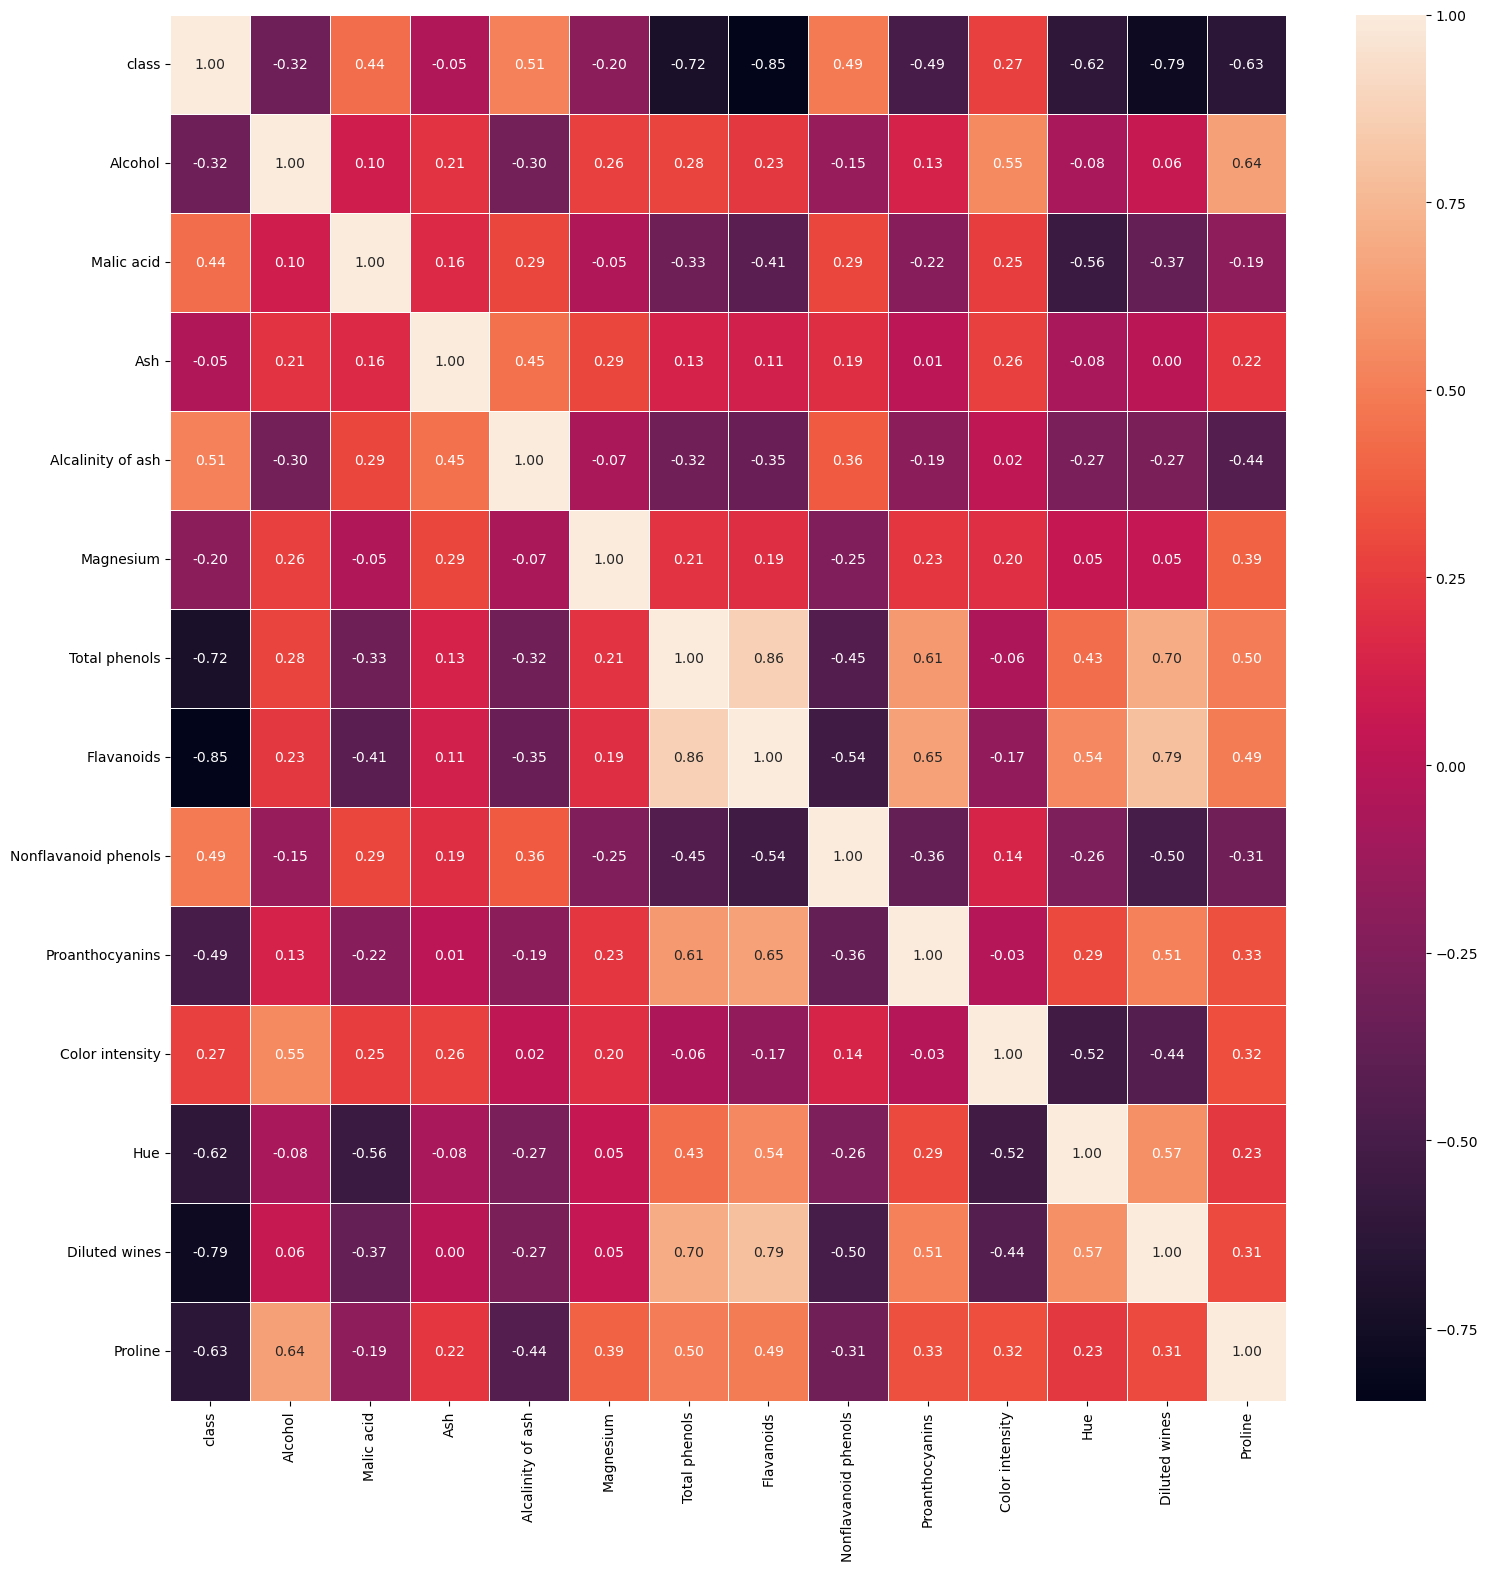

In [5]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(Data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

PCA降维

In [6]:
X = Data.iloc[:,1:].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=0.95) #保证降维后保持95%的信息
pca.fit(X)
X = pca.transform(X)
Y = Data['class']
print(X.shape)

(177, 10)


## 数据集划分

刚刚PCA降维之后从原本的13个特征变成了现在的10个特征，现在用留出法来划分数据集为训练集和验证集。

In [7]:
seed = 666666
random.seed(seed)

data = np.column_stack((Data['class'], X))
Data = pd.DataFrame(data = data[0:,0:], columns=['Y','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'])

# 80%用于训练
n_train = int(n * 0.8)
n_test = n - n_train
index = range(0,n)
index_selected = random.sample(index,n_train)
index_selected.sort()


Data_train = Data.loc[index_selected]
Data_test = Data.drop(index = index_selected)
print(Data_train.head())
print(Data_test.head())

     Y        X1        X2        X3        X4        X5        X6        X7  \
0  1.0  2.230243  0.302313 -2.032920 -0.281906 -0.259540 -0.927615  0.079724   
1  1.0  2.531922 -1.062257  0.976724  0.735727 -0.198602  0.557252  0.432350   
2  1.0  3.754677 -2.805309 -0.180370  0.577125 -0.257871  0.100109 -0.364924   
5  1.0  2.458228 -1.207065 -0.988236 -0.004678 -1.030103 -0.613463  0.066139   
6  1.0  2.061605 -1.640485  0.143768 -1.199707  0.010484 -1.445137  0.058393   

         X8        X9       X10  
0  1.026470 -0.313145  0.131256  
1 -0.335611 -1.179069  0.006752  
2  0.646847  0.067906  0.373320  
5 -0.375278 -0.534132  0.925159  
6  0.228268  0.081620  0.793148  
      Y        X1        X2        X3        X4        X5        X6        X7  \
3   1.0  1.020131 -0.888380  2.023870 -0.432792  0.275235 -0.403139  0.454721   
4   1.0  3.049199 -2.170007 -0.638747 -0.487628 -0.631358  0.130817  0.421297   
17  1.0  3.540130 -2.573414 -0.498949 -0.852835 -1.168261  0.306130 -0.0

在数据集划分之后，要进行一些预处理，主要是对X进行标准化。

In [8]:
X_train = Data_train.drop(columns = ['Y'],axis = 1)
Y_train = Data_train.Y

X_test = Data_test.drop(columns = ['Y'],axis=1)
Y_test = Data_test.Y

X_train_standardized = preprocessing.scale(X_train, with_mean = True, with_std=True) / np.sqrt(n_train)
X_test_standardized = preprocessing.scale(X_test, with_mean = True, with_std=True) / np.sqrt(n_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

## 使用各模型进行分类

### SVM

In [24]:
params = {
    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
     'C': [1e-3,0.01,0.1, 1, 10, 100,1000],
}
svm = GridSearchCV(SVC(),params)
svm = svm.fit(X_train_standardized, Y_train)
print('best params:', svm.best_params_)

y_pred = svm.predict(X_test_standardized)
num_true = np.sum(y_pred == Y_test)
acc_svm = num_true / Y_test.shape[0]

print(f'预测正确的数目为{num_true},准确率:{acc_svm}')
print(classification_report(Y_test, y_pred))

best params: {'C': 100, 'kernel': 'linear'}
预测正确的数目为33,准确率:0.9166666666666666
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.80      0.89        15
           3       0.75      1.00      0.86         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.94      0.92      0.92        36



In [25]:
#五折交叉验证
svm=SVC(C=100,kernel='linear')
scores = cross_val_score(svm, X, Y, cv=5, scoring='accuracy')
print(f'五折交叉验证结果:{scores}')

五折交叉验证结果:[0.91666667 0.97222222 1.         1.         0.94285714]


### 决策树

In [32]:
tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, ccp_alpha=0.0)
tree_model.fit(X_train_standardized, Y_train)
y_pred = tree_model.predict(X_test_standardized)
num_true = np.sum(y_pred == Y_test)
acc_tree = num_true / Y_test.shape[0]

print(f'预测正确的数目为{num_true},准确率:{acc_tree}')
print(classification_report(Y_test, y_pred))

预测正确的数目为32,准确率:0.8888888888888888
              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.92      0.80      0.86        15
           3       0.90      1.00      0.95         9

    accuracy                           0.89        36
   macro avg       0.89      0.91      0.89        36
weighted avg       0.89      0.89      0.89        36



In [33]:
#五折交叉验证
scores = cross_val_score(tree_model, X, Y, cv=5, scoring='accuracy')
print(f'五折交叉验证结果:{scores}')

五折交叉验证结果:[0.97222222 0.91666667 0.91428571 0.94285714 0.91428571]


决策树可视化

In [34]:
dot_data = StringIO()
feature_names = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
target_names = ['1', '2', '3']
tree.export_graphviz(tree_model, out_file=dot_data, feature_names=feature_names, class_names=target_names, filled=True,  rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")

True

### 多层感知机

In [39]:
mlp = Pipeline([('scale', StandardScaler()), ('MLPRegressor', MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 2), max_iter=5000, random_state=1))])
mlp = mlp.fit(X_train_standardized, Y_train)
y_pred = mlp.predict(X_test_standardized)
y_pred = np.around(y_pred)
for i in range(len(y_pred)):
    if y_pred[i] >= 3:
        y_pred[i] = 3
num_true = np.sum(y_pred == Y_test)
acc_mlp = num_true / Y_test.shape[0]

print(f'预测正确的数目为{num_true},准确率:{acc_mlp}')
print(classification_report(Y_test, y_pred))

预测正确的数目为28,准确率:0.7777777777777778
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.89      0.53      0.67        15
           3       0.60      1.00      0.75         9

    accuracy                           0.78        36
   macro avg       0.80      0.82      0.78        36
weighted avg       0.83      0.78      0.77        36



### 逻辑回归

In [40]:
lr = LogisticRegression().fit(X_train_standardized, Y_train)
y_pred = lr.predict(X_test_standardized)
num_true = np.sum(y_pred == Y_test)
acc_lr = num_true / Y_test.shape[0]

print(f'预测正确的数目为{num_true},准确率:{acc_lr}')
print(classification_report(Y_test, y_pred))

预测正确的数目为35,准确率:0.9722222222222222
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [41]:
#五折交叉验证
scores = cross_val_score(lr, X, Y, cv=5, scoring='accuracy')
print(f'五折交叉验证结果:{scores}')

五折交叉验证结果:[0.97222222 0.97222222 1.         1.         1.        ]


### 随机森林

In [42]:
forest = RandomForestRegressor(n_estimators=100, min_samples_split=5, max_depth=10)
forest = forest.fit(X_train_standardized, Y_train)
y_pred = forest.predict(X_test_standardized)
y_pred = np.around(y_pred)
num_true = np.sum(y_pred == Y_test)
acc_forest = num_true / Y_test.shape[0]

print(f'预测正确的数目为{num_true},准确率:{acc_forest}')
print(classification_report(Y_test, y_pred))

预测正确的数目为34,准确率:0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.93      0.93      0.93        15
           3       0.90      1.00      0.95         9

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



随机森林的可视化

In [43]:
estimators = forest.estimators_
for index, model in enumerate(estimators):
    dot_data = tree.export_graphviz(model , out_file=None,
                         feature_names=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'],
                         class_names=['1', '2', '3'],
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf("forest.pdf")

### adaboost

In [44]:
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
adaboost = adaboost.fit(X_train_standardized, Y_train)
y_pred = adaboost.predict(X_test_standardized)
y_pred = np.around(y_pred)
num_true = np.sum(y_pred == Y_test)
acc_adaboost = num_true / Y_test.shape[0]

print(f'预测正确的数目为{num_true},准确率:{acc_adaboost}')
print(classification_report(Y_test, y_pred))

预测正确的数目为33,准确率:0.9166666666666666
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.93      0.87      0.90        15
           3       0.90      1.00      0.95         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



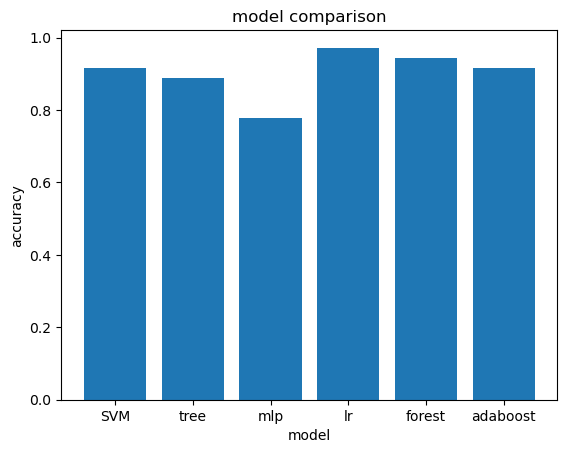

In [48]:
x = ['SVM', 'tree', 'mlp','lr', 'forest', 'adaboost']
y = [acc_svm, acc_tree, acc_mlp,acc_lr,acc_forest,acc_adaboost]
plt.bar(x, y)
plt.xticks(x)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("model comparison")
plt.show()